In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def funcao_ativacao(potencial_ativacao_u):
    return potencial_ativacao_u >= 0

In [3]:
def plotar_fronteira(pesos, entradas, desejados):
    plt.style.use('ggplot')

    b, w1, w2 = pesos
    print("pesos:")
    print(b, w1, w2)
    x = -b / w1
    y = -b / w2
    d = y
    c = -y / x

    line_x_coords = np.array([0, x])
    print("coordenadas x:")
    print(line_x_coords)
    line_y_coords = c * line_x_coords + d
    print("coordenadas y:")
    print(line_y_coords)

    plt.plot(line_x_coords, line_y_coords)
    plt.scatter(entradas[:, 0], entradas[:, 1], c=desejados, s=75)
    plt.show()

In [4]:
def perceptron(iteracoes_maxima, erros, taxa_aprendizagem, entradas_x, pesos_w, desejados_d, plot = True, debug = False):
    ##Adiciona um coeficiente 1 para o bias na matriz de entradas
    np_entradas = np.c_[np.ones(entradas_x.shape[0]), entradas_x]
    if debug:
        print("entradas: " + str(np_entradas))
    epoca = 1
    temErros = True
    while (epoca < iteracoes_maxima and temErros):
        erros_epoca = 0
        for i in range(len(np_entradas)):
            entrada = np_entradas[i]
            if debug:
                print("entrada: " + str(entrada))
            desejado = np_desejados[i]
            if debug:
                print("desejado: " + str(desejado))
            if debug:
                print("pesos: " + str(pesos_w))
            potencial_ativacao_u = np.dot(entrada, pesos_w)
            if debug:
                print("potencial de ativação u: " + str(potencial_ativacao_u))
            saida_y = funcao_ativacao(potencial_ativacao_u)
            if debug:
                print("saída y: " + str(saida_y))
            erro_e = desejado - saida_y
            if debug:
                print("erro: " + str(erro_e))
            mudanca_pesos = taxa_aprendizagem * np.dot(erro_e, entrada)
            if debug:
                print("mudança: " + str(mudanca_pesos))
            pesos_w += mudanca_pesos
            if debug:
                print("novos pesos: " + str(pesos_w))
            if desejado != saida_y:
                erros_epoca += 1
        erros.append(erros_epoca)
        #print("época %s: %s erros" % (str(epoca), str(erros_epoca)))
        temErros = erros_epoca > 0
        if (plot):
            #if ((epoca == 1 or epoca % 2 == 0) or (not temErros)):
            print("época " + str(epoca))
            plotar_fronteira(pesos_w, entradas_x, desejados_d)
        if (temErros):
            epoca += 1
            if debug:
                print("tem erros, avançando para época " + str(epoca))
    return pesos_w, epoca, erros

época 1
pesos:
-0.6649 0.4192 0.4129
coordenadas x:
[ 0.          1.58611641]
coordenadas y:
[ 1.61031727  0.        ]


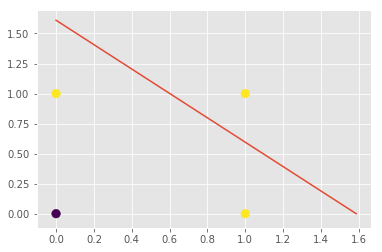

época 2
pesos:
-0.4649 0.5192 0.5129
coordenadas x:
[ 0.          0.89541602]
coordenadas y:
[  9.06414506e-01  -1.11022302e-16]


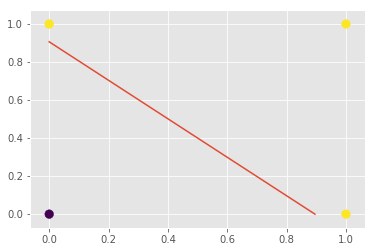

época 3
pesos:
-0.4649 0.5192 0.5129
coordenadas x:
[ 0.          0.89541602]
coordenadas y:
[  9.06414506e-01  -1.11022302e-16]


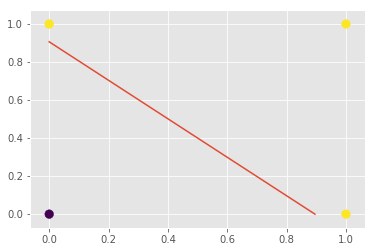

final:
pesos [-0.4649  0.5192  0.5129]
3 épocas


In [5]:
##Trata bias como um peso w0
pesos_w = np.array([-.8649, .3192, .3129])
np_desejados = np.array([0, 1, 1, 1])
entradas = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
pesos, epocas, erros = perceptron(iteracoes_maxima=500, erros=[], taxa_aprendizagem=0.1, entradas_x=entradas, pesos_w=pesos_w, desejados_d=np_desejados, plot = True, debug = False)
print("final:\npesos %s\n%s épocas" % (str(pesos), str(epocas)))

In [6]:
##Testa função de ativação com pesos finais
np_entradas = np.c_[ np.ones(entradas.shape[0]), entradas ]
funcao_ativacao(np.dot(np_entradas, pesos))

array([False,  True,  True,  True], dtype=bool)

época 1
pesos:
0.0 0.0 0.1
coordenadas x:
[  0.  nan]
coordenadas y:
[ nan  nan]


/media/discoD/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in double_scalars


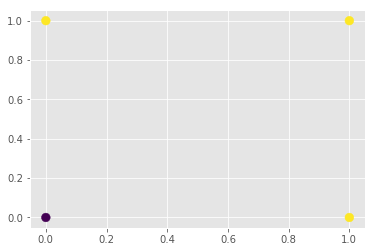

época 2
pesos:
0.0 0.1 0.1
coordenadas x:
[ 0. -0.]
coordenadas y:
[ nan  nan]


/media/discoD/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in double_scalars


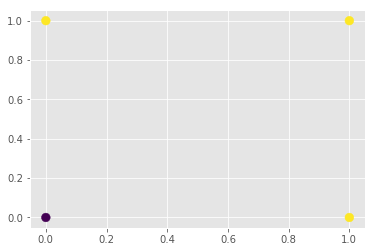

época 3
pesos:
-0.1 0.1 0.1
coordenadas x:
[ 0.  1.]
coordenadas y:
[ 1.  0.]


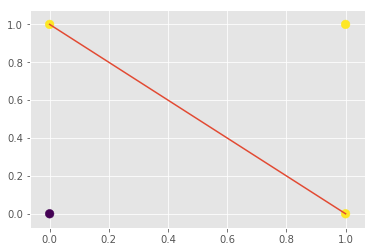

época 4
pesos:
-0.1 0.1 0.1
coordenadas x:
[ 0.  1.]
coordenadas y:
[ 1.  0.]


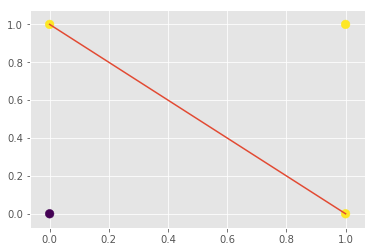

final:
pesos [-0.1  0.1  0.1]
4 épocas


In [7]:
##Trata bias como um peso w0
pesos_w = np.zeros(3)
np_desejados = np.array([0, 1, 1, 1])
entradas = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
pesos, epocas, erros = perceptron(iteracoes_maxima=500, erros=[], taxa_aprendizagem=0.1, entradas_x=entradas, pesos_w=pesos_w, desejados_d=np_desejados, plot = True, debug = False)
print("final:\npesos %s\n%s épocas" % (str(pesos), str(epocas)))

In [8]:
##Testa função de ativação com pesos finais
np_entradas = np.c_[ np.ones(entradas.shape[0]), entradas ]
funcao_ativacao(np.dot(np_entradas, pesos))

array([False,  True,  True,  True], dtype=bool)